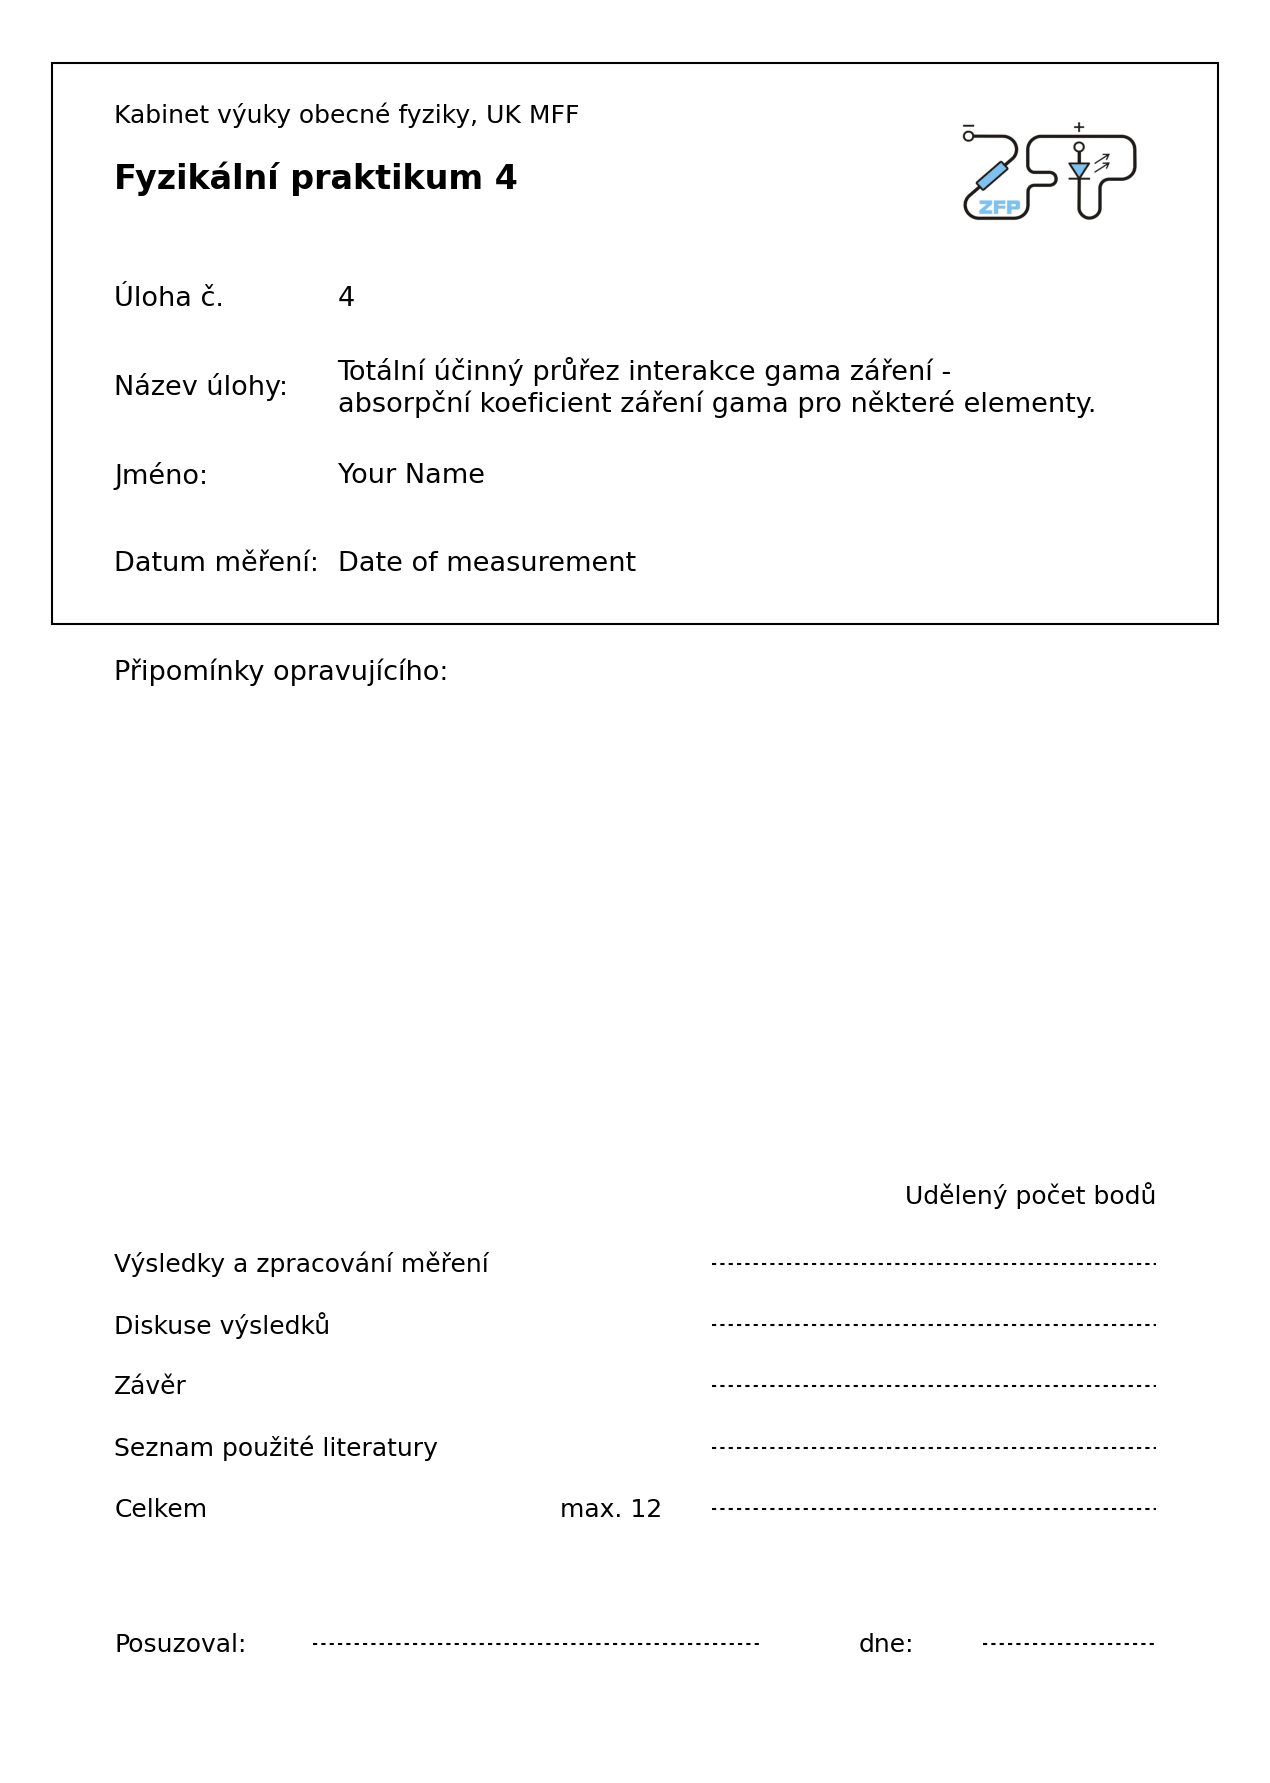

In [1]:
# TODO: Replace the string "Your Name" and "Date of measurement" with the appropriate values.

from header import header
_ = header(student="Your Name", date="Date of measurement", task_no=4)

$\color{red}{\textbf{DŮLEŽITÉ}}$ Pokud nemáte nainstalované všechny potřebné knihovny, spusťte následující buňku:

In [2]:
!pip install numpy matplotlib scipy pandas uncertainties

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import numpy as np
import uncertainties
from IPython.display import display, Latex

# Totální účinný průřez interakce gama záření - absorpční koeficient záření gama pro některé elementy

# Pracovní úkoly  
 1. Určete absorpční koeficient záření $\gamma$ pro olovo, kadmium a železo v závislost na energii.
 2. Stanovte polotloušťku výše uvedených materiálů pro energie dostatečně intenzivních přechodů používaného zářiče.
 3. Srovnejte naměřené hodnoty absorpčního koeficientu s hodnotami tabulkovými pro olovo, kadmium a železo.
 4. Diskutujte vliv jednotlivých interakcí $\gamma$ záření s látkou na naměřené hodnoty v používané experimentální geometrii.

# Úvod

Proces zeslabení svazku gama záření v prostředí nelze považovat za spojitý, jak je tomu u těžkých nabitých částic. Při interakci fotonu s elektrony atomového obalu prostředí buď foton ztratí veškerou svou energii fotoelektrickým jevem nebo tvorbou elektron-pozitronových párů, nebo její část Comptonovým (nekoherentním) rozptylem. Tvorba elektron-pozitronových párů může přirozeně probíhat také v poli jádra. Při koherentním rozptylu foton nedeponuje energii, ale mění směr. Při nekoherentním rozptylu kromě ztráty energie také mění směr. Důsledkem těchto interakcí pro experiment je zeslabení svazku gama záření při průchodu vrstvou materiálu tloušťky $t$ podle vztahu:
$$
N = N_0 e^{-\mu t},
$$
kde $N_0$ je počet gama kvant dopadajících na vrstvu materiálu tloušťky $t$, $N$ je počet fotonů s původní energií za vrstvou materiálu, $\mu$ je absorpční koeficient nebo lineární zeslabovací koeficient s rozměrem $\mathrm{mm}^{-1}$.
Protože závislost zeslabení svazku gama záření na tloušťce materiálu má exponenciální charakter, vždy existuje nenulová pravděpodobnost, že gama kvantum projde jakoukoli tloušťkou jakéhokoli materiálu bez interakce.
Pro každou danou energii dopadajících fotonů $E_\gamma$ se tak může volná dráha jednotlivých fotonů významně lišit od střední volné dráhy $1/\mu(E_\gamma)$.

Interakce elektromagnetického záření s hmotou je velmi dobře známa. Jednotlivé účinné průřezy jako funkce energie fotonu jsou mimo jiné tabelovány [1]. Závislost absorpčního koeficientu $\mu$ na energii dopadajících fotonů $E_\gamma$ je ukázána pro olovo na níže uvedeném obrázku. Pro konkrétní experimenty je často praktičtější určit zeslabení svazku experimentálně (pro konkrétní detektor, geometrii, ...) a případně jej ověřit pomocí počítačové simulace metodou Monte Carlo.

$\color{red}{\textbf{Úkol:}}$ Stáhněte si tabelovaná data. Upravte do námi používaných jednotek. Pro jeden prvek vykreslete graf.

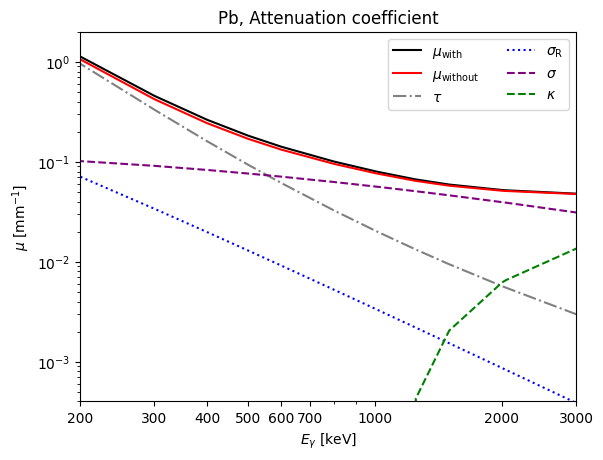

In [ ]:
# Solution:
# Read in the theory values, and convert them to units of mm^-1.
# Convert units of E to keV.
# TODO finish scales below
scale = {'Cd': 8.65/10, 'Fe': 7.86/10, 'Pb': 11.34/10}

# Read.
from pathlib import Path

DATA_DIR = Path("./data/")   # adjust if needed

COLS = ['E', 'sigma_R', 'sigma', 'tau', 'kappa_n', 'kappa_e', 'w', 'wo']

dfs = {}  # dictionary to hold element → DataFrame

for file in sorted(DATA_DIR.glob("*_theory_all.txt")):
    # Extract symbol from filename, e.g. Pb_theory_all.txt → Pb
    m = re.match(r"(?P<sym>[A-Za-z0-9]+)_theory_all\.txt$", file.name)
    symbol = m.group("sym") if m else file.stem

    # Read file (skip text header, ignore last empty column)
    df = pd.read_csv( file, sep=r"\s+", names=COLS, engine="python", usecols=range(8))

    # Convert and compute
    df['E'] *= 1000
    df.loc[:, df.columns != "E"] *= scale.get(symbol, 1.0)
    df['kappa_tot'] = df['kappa_n'] + df['kappa_e']

    # Store for later use
    dfs[symbol] = df

# Now you can access them like:
dfs["Pb"].head()

# Plot the curves.
from matplotlib.ticker import LogLocator, ScalarFormatter
fig, ax = plt.subplots()

ax.plot(dfs["Pb"]['E'], dfs["Pb"]['w'],          label=r'$\mu_\mathrm{with}$',    color='black', linestyle='-')
ax.plot(dfs["Pb"]['E'], dfs["Pb"]['wo'],         label=r'$\mu_\mathrm{without}$', color='red',   linestyle='-')
ax.plot(dfs["Pb"]['E'], dfs["Pb"]['tau'],        label=r'$\tau$',                 color='gray',  linestyle='-.')
ax.plot(dfs["Pb"]['E'], dfs["Pb"]['sigma_R'],    label=r'$\sigma_\mathrm{R}$',    color='blue',  linestyle=':')
ax.plot(dfs["Pb"]['E'], dfs["Pb"]['sigma'],      label=r'$\sigma$',               color='purple',linestyle='--')
ax.plot(dfs["Pb"]['E'], dfs["Pb"]['kappa_tot'],  label=r'$\kappa$',               color='green', linestyle='--')

ax.set_xlabel(r'$E_\gamma\ [\mathrm{keV}]$')
ax.set_ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
ax.set_title("Pb, Attenuation coefficient")
ax.legend(ncol=2)

ax.set_yscale('log')
ax.set_ylim(4e-4, 2e0)

ax.set_xscale('log')
ax.set_xlim(2e2, 3e3)

# Major ticks on log x-axis
ax.xaxis.set_major_locator(LogLocator(base=10, subs=[1,2,3,4,5,6,7]))
ax.xaxis.set_major_formatter(ScalarFormatter())

plt.show()

$\color{red}{\textbf{Řešení:}}$ Obrázek 1: Závislost absorpčního koeficientu $\mu$ na energii fotonu $E_\gamma$ pro olovo. Graf rozlišuje jednotlivé procesy přispívající k zeslabení fotonového svazku v měřeném energetickém rozsahu, konkrétně fotoelektrický jev $\tau$, koherentní neboli Rayleighův rozptyl $\sigma_\mathrm{R}$, Comptonův rozptyl $\sigma$ a tvorbu elektron-pozitronových párů $\kappa$. Celkové zeslabení svazku je pak popsáno dvěma křivkami - se zahrnutím koherentního rozptylu jako zeslabujícího procesu $\mu_\mathrm{with}$ a bez něj, $\mu_\mathrm{without}$. Křivky jsou interpolací hodnot z [1].

# Experimentální sestava

Jako zdroj fotonů se používá zářič $^{226}\mathrm{Ra}$. Počet detekovaných fotonů jako funkce energie se měří pomocí polovodičového germaniového detektoru připojeného k počítači se spektroskopickým softwarem. Zásuvka ve stojanu pod zářičem (a nad detektorem) slouží k vkládání vrstev jednotlivých materiálů.


# Měření

Doba měření pro každý materiál je typicky nastavena na 250 nebo 300 sekund. Měření probíhá v následujících krocích:
- Spektrum $^{226}\mathrm{Ra}$ se měří bez jakéhokoli stínění.
  - Výsledné spektrum se používá pro kalibraci spektrometru. Energie intenzivních linií $^{226}\mathrm{Ra}$ jsou dobře známy [2,3] a jsou přiřazeny odpovídajícím pozicím píků ve spektru. Spektroskopický software kalibraci počítá interně.
  - Toto spektrum slouží zároveň jako měření pro všechny materiály s nulovou tloušťkou. Označíme alespoň 10 singletních, lokálně nejintenzivnějších píků. Označíme také pík přirozeného pozadí $^{40}\mathrm{K}$ na energii asi 1461 keV [4].
- Provede se dvanáct dalších měření stejného spektra se stejně označenými píky:
  - Pro čtyři různé tloušťky tří různých materiálů - Cd, Pb, Fe.
    - U každého materiálu je k dispozici několik destiček, které lze postupně navršit do zásuvky mezi radioaktivní zdroj a detektor.
  - Díky tomu získáme měření pro pět různých tlouštěk stínění pro každý materiál, protože je zahrnuto také měření bez stínění (tj. tloušťka 0 mm), které je společné pro všechny materiály.
- V každém spektru je identifikováno alespoň 10 píků a je určen počet událostí v každém píku.
  - Počet událostí v každém píku je určen softwarem používaným k ovládání spektrometru.
    - Počet událostí v každém píku je korigován na kontinuum.
  - Software také poskytuje energii každého píku.
  - Počet událostí v každém píku klesá exponenciálně s tloušťkou stínění.
    - Připomeňme si vzorec $N = N_0 e^{-\mu t}$.
    - Připomeňme si, že zeslabovací koeficient je funkcí energie fotonů: $\mu = \mu(E_\gamma)$.
      - Předem definované píky odpovídají různým energiím fotonů. Můžeme tak současně měřit zeslabovací koeficient pro různé energie.
- V každém spektru je také všudypřítomný pík 1461 keV z rozpadu $^{40}\mathrm{K}$.
  - $^{40}\mathrm{K}$ je běžný zdroj pozadí.
  - Jako pozadí přicházejí fotony z rozpadů $^{40}\mathrm{K}$ k detektoru ze všech směrů. Proto počet událostí v píku 1461 keV není ovlivněn tloušťkou stínění.

$\color{red}{\textbf{Úkol:}}$ Načtěte naměřená data z textových souborů. Vytiskněte data odpovídající stavu bez stínění jako tabulku. Data jsou informace o označených pících. Pro každý pík je zejména uvedena:
- energie píku,
- počet událostí v píku (a jeho nejistota).

In [ ]:
# Read in the data from the .dat file and store it in a pandas dataframe.
# The data is stored in format separated by blank spaces.
# Preprocess the file so that each row with less than 7 columns is filled with NaN values.
# For preprocessing, read the file line by line and split the line by the separator.
def read_data(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    fixed_lines = []
    for line in lines:
        # Replace "number-number" with "number number"
        line = re.sub(r'(\d+)-(\d+)', r'\1 \2', line)
        fixed_lines.append(line)

    # Save to temporary string or file-like buffer
    from io import StringIO
    buf = StringIO("".join(fixed_lines))

    # Now parse with whitespace delimiter
    data = pd.read_csv(buf, sep=r"\s+", skiprows=2, header=None)

    # Drop columns 2–4 (Python index 1:3 inclusive)
    # Keep 1st and 5th–9th (i.e. indices 0,4,5,6,7,8)
    data = data.iloc[:, [0, 4, 5, 6, 7, 8]]

    # Rename the columns of the dataframe to the following:
    data.columns = ['PN', 'E', 'FWHM', 'N', 'dN', 'B']

    return data

    
# Read the data corresponding to no shielding.
data0 = read_data('data/0.dat')

# Print data0 to see whether the format is correct.
print(data0.to_string(index=False))

# Read in data from the following files in exactly the same way:
#              Cd_0214.dat  Cd_0428.dat  Fe_0500.dat  Fe_1578.dat  Pb_0530.dat  Pb_0762.dat  
# Cd_0106.dat  Cd_0322.dat  Fe_1092.dat  Fe_2074.dat  Pb_0650.dat  Pb_0872.dat  
# All dataframes are stored in a dictionary with the keys being Cd, Fe, Pb.
# The values are dictionaries: {thickness: dataframe, thickness: dataframe, ...}
# where thickness is the thickness of the shielding in 10e-5 m and dataframe is the dataframe.
# The thickness is the number in the file name before the .dat extension.

files = ['data/Cd_0106.dat', 'data/Cd_0214.dat', 'data/Cd_0322.dat', 'data/Cd_0428.dat', 'data/Fe_0500.dat', 'data/Fe_1092.dat', 'data/Fe_1578.dat', 'data/Pb_0530.dat', 'data/Pb_0650.dat', 'data/Pb_0762.dat', 'data/Pb_0872.dat']
data_dict = {}
for file in files:
    element = file.split('/')[-1].split('_')[0]
    thickness = int(file.split('_')[-1].split('.')[0]) / 100.
    data = read_data(file)
    if element not in data_dict:
        data_dict[element] = {0. : data0} # Store the data with no shielding to the first element of the list
    data_dict[element][thickness] = data

 PN       E  FWHM       N     dN        B
  1  295.06  1.30 15210.0 262.73 10500.00
  2  351.83  1.34 45440.0 313.41  9986.00
  3  608.94  1.48 87300.0 356.10  5758.00
  4  767.86  1.60  9272.0 192.64  3973.00
  5  933.42  1.61  5179.0 170.32  3595.00
  6 1119.45  1.77 25470.0 216.00  2607.00
  7 1237.18  1.92  9375.0 157.11  2041.00
  8 1376.56  1.92  6068.0 140.60  1824.00
  9 1459.94  1.27   441.8  79.25  1165.00
 10 1508.08  1.94  3109.0 118.62  1654.00
 11 1659.95  1.68  1238.0  75.94   718.20
 12 1763.18  2.15 20770.0 163.26   537.30
 13 1846.06  1.95  2720.0  79.39   479.00
 14 2116.85  2.24  1460.0  56.67   200.10
 15 2202.43  2.14  5647.0  90.28   213.40
 16 2445.88  2.33  1609.0  41.56    10.38


$\color{red}{\textbf{Úkol:}}$ Načtěte teoretické hodnoty zeslabovacích koeficientů gama záření ve Fe, Cd a Pb z textových souborů, které byly poskytnuty online databází [1]. Všimněte si, že zeslabovací koeficienty jsou uvedeny v $\mathrm{cm}^2/\mathrm{g}$. Vynásobte je hustotou materiálu, abyste získali zeslabovací koeficient v $\mathrm{cm}^{-1}$. Převeďte jednotky na $\mathrm{mm}^{-1}$. Vykreslete teoretickou závislost zeslabovacího koeficientu na energii gama záření pro každý materiál. Graf by měl obsahovat dvě křivky pro každý materiál - se zahrnutím koherentního rozptylu jako zeslabujícího procesu a bez něj.

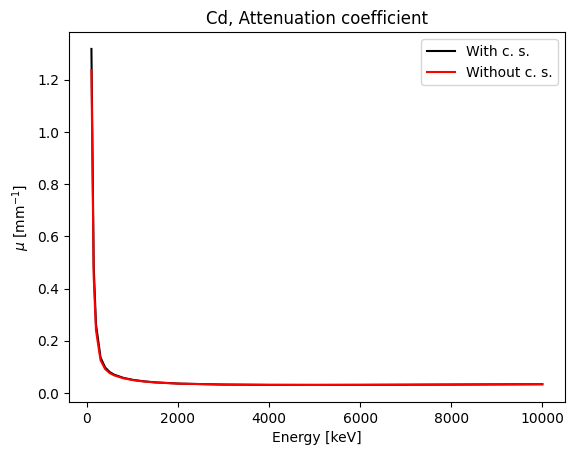

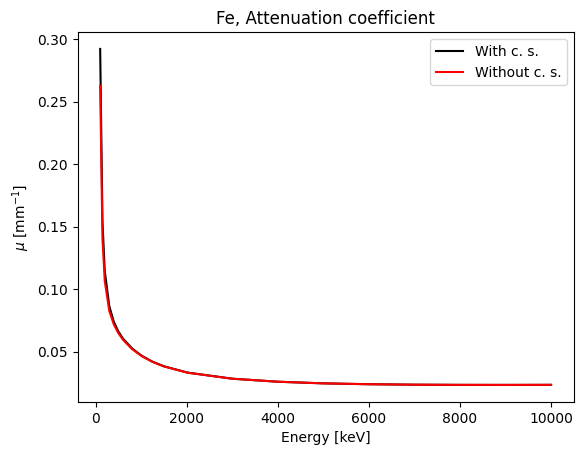

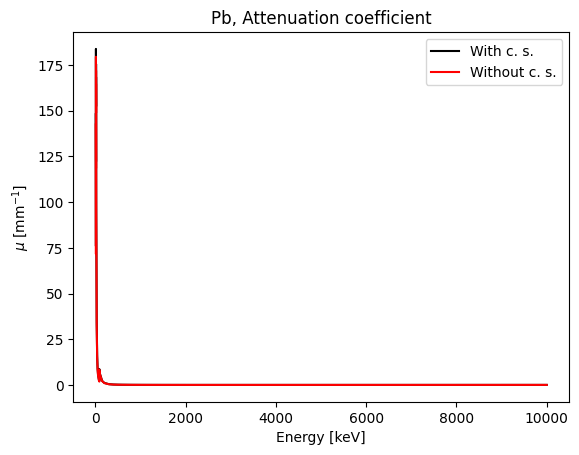

In [6]:
# Read in the data to the theory dictionary
theory = {}
for element in data_dict:
    theory[element] = dfs[element]

# Plot the curves.
for element in theory:
    df = theory[element]
    plt.plot(df['E'], df['w'] , label='With c. s.'   , color='black')
    plt.plot(df['E'], df['wo'], label='Without c. s.', color='red')
    plt.xlabel('Energy [keV]')
    plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
    plt.title(f'{element}, Attenuation coefficient')
    plt.legend()
    plt.show()

Pro vykreslování dat spolu s fitovanou křivkou může být užitečná následující python funkce:

In [7]:
def plot(x, y, y_err, x_fit, y_fit, y_fit_lower, y_fit_upper, xlabel, ylabel, title = ''):

    # draw x, y with error bars
    plt.errorbar(x, y, y_err, fmt='o', label='Data', color='black')

    # draw the fit function and its uncertainty band
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.3)

    # create a legend entry for the fit function and its uncertainty band
    line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
    band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

    # get the current legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

    # finally, plot
    plt.plot(x_fit, y_fit, 'r-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title != '':
        plt.title(title)
    plt.show()

    return

$\color{red}{\textbf{Úkol:}}$ Pro každý stínicí materiál (Fe, Cd, Pb) a pro každý pík určete zeslabovací koeficient $\mu$:
- Provedněte fit grafu počtu událostí v píku, $N$, proti tloušťce stínění.
  - V grafu je pět bodů: bez stínění a čtyři různé tloušťky stínění.
  - Fitovací funkce je $N = N_0 e^{-\mu t}$.
  - Vykreslete data a fitovanou křivku pro dva vámi vybrané píky pro každý materiál.
- Uložte zeslabovací koeficient $\mu$ a odpovídající energii pro každý pík.
  - Např. do slovníku s energií jako klíčem a zeslabovacím koeficientem jako hodnotou.

/var/folders/_h/79t6cgds3rbb85gg3sjf_6q80000gn/T/ipykernel_80585/3926153543.py:16: RuntimeWarning: overflow encountered in exp
  return N0 * np.exp(-mu * x)


<IPython.core.display.Latex object>

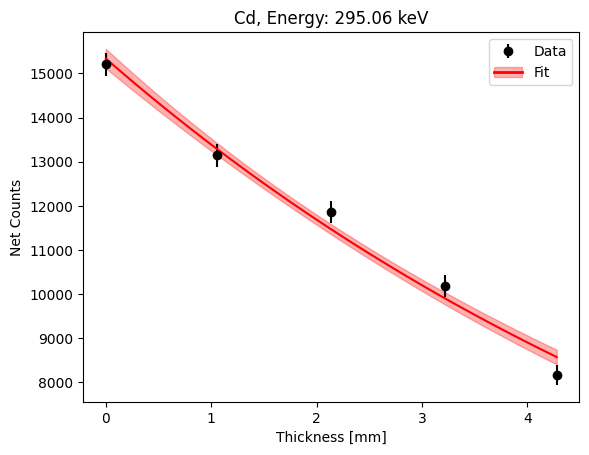

<IPython.core.display.Latex object>

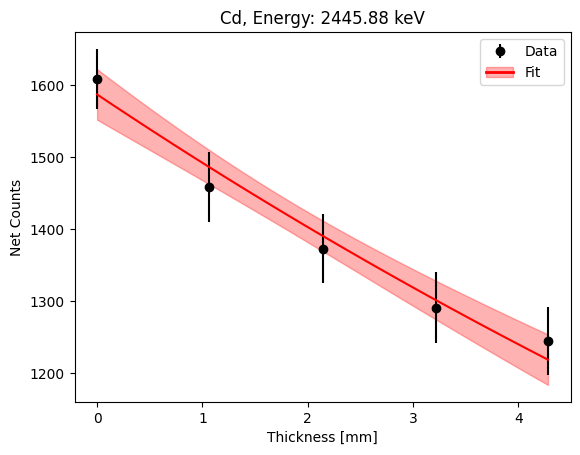

<IPython.core.display.Latex object>

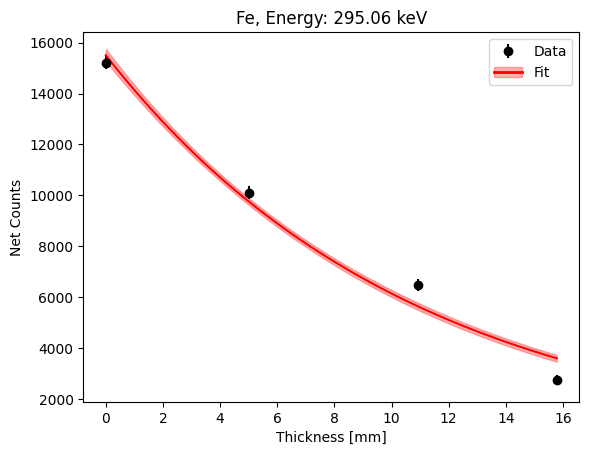

<IPython.core.display.Latex object>

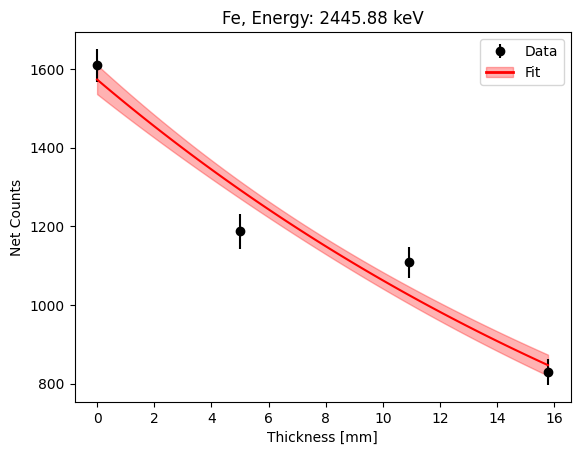

<IPython.core.display.Latex object>

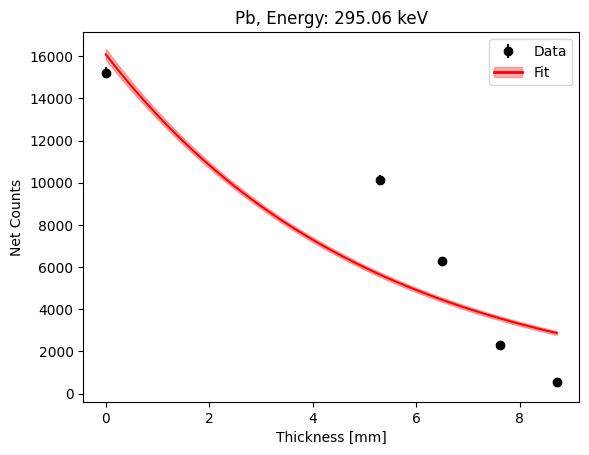

<IPython.core.display.Latex object>

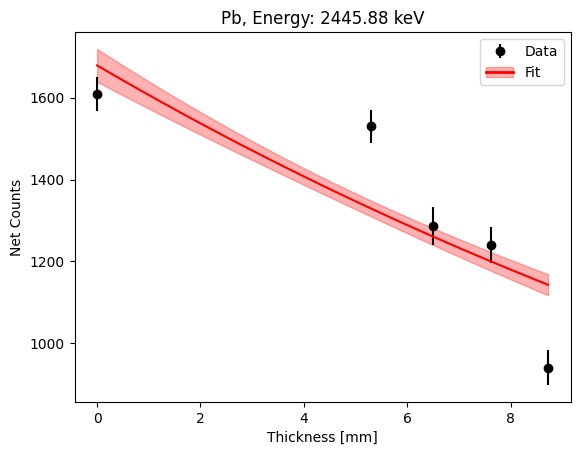

In [8]:
# Do the following for each element in the dictionary:
# - Create a new dataframe with the following columns:
#   - PN
#   - E
#   - mu
#   - mu_unc
# mu is the linear attenuation coefficient in mm^-1 and mu_unc is the uncertainty on mu.
# mu is evaluated in a fit of the form N = N0 * exp(-mu * thickness)
# where N is the net counts in a peak, N0 is the net counts with no shielding, and thickness is the thickness of the shielding.
# The uncertainty in N, estimated as sqrt(N), is taken into account in the fit.
# The uncertainty in mu is calculated in the fitting algorithm.

from scipy.optimize import curve_fit

def fit_func(x, mu, N0):
    return N0 * np.exp(-mu * x)

# Store the fit results - the mu values and their uncertainties - in a dictionary together with the corresponding energies.
fit_results = {element : {} for element in data_dict}

for element in data_dict:
    for irow in range(16): # TODO specify number of peaks
        if irow == 8: # TODO Skip the row with the potassium 40 background peak
            continue
        thickness = np.array(sorted(data_dict[element].keys()))
        N         = np.array([data_dict[element][t].loc[irow, 'N'] for t in thickness])
        dN        = np.array([data_dict[element][t].loc[irow, 'dN'] for t in thickness])

        try:
            nom, cov = curve_fit(fit_func, thickness, N, sigma=dN, absolute_sigma=True)
            mu = nom[0]
            mu_unc = np.sqrt(cov[0, 0])
        except:
            mu = np.nan
            mu_unc = np.nan
    
        # Store the fit result
        energy = data_dict[element][0.].loc[irow, 'E']
        fit_results[element][energy] = uncertainties.ufloat(mu, mu_unc)

        # Prepare the fit result plotting
        x = np.linspace(thickness.min(), thickness.max(), 100)
        mu, N0 = uncertainties.correlated_values(nom, cov)
        wrapped_exp = uncertainties.wrap(fit_func)
        y_fit_list = [wrapped_exp(x, mu, N0) for x in x]
        y_fit      = np.array([y.nominal_value for y in y_fit_list])
        sigma_fit  = np.array([y.std_dev       for y in y_fit_list])

        # Plot the data and the fit function with its uncertainty band
        title = f'{element}, Energy: {data_dict[element][0.].loc[irow, "E"]} keV'
        if irow in [0, 15]: # TODO select good examples of the fits
            display(Latex(fr'{title} $ \quad \mu = {mu:.1uS}~\mathrm{{mm}}^{{-1}} \quad N_0 = {N0:.3uS}$'))
            plot(thickness, N, dN, x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, 'Thickness [mm]', 'Net Counts', title)


$\color{red}{\textbf{Úkol:}}$ Vytiskněte tabulku se zeslabovacími koeficienty pro každou energii a každý materiál. Zahrňte také poloviční vrstvu (HVL), $t_{1/2}$, pro každou energii a každý materiál. HVL je definována jako tloušťka materiálu, která sníží intenzitu svazku gama záření na polovinu jeho počáteční hodnoty. HVL lze vypočítat jako:
$$
t_{1/2} = \frac{\ln(2)}{\mu}.
$$

In [9]:
# Python DataFrame is suitable for presenting the results.

df = pd.DataFrame(fit_results)
df = df.rename_axis('Energy [keV]').reset_index()

for element in data_dict:
    df[f't_{element} [mm]'] = np.log(2) / df[element]

df = df.rename(columns={'Cd': 'mu_Cd [mm^-1]', 'Fe': 'mu_Fe [mm^-1]', 'Pb': 'mu_Pb [mm^-1]'})
print(df)

    Energy [keV]    mu_Cd [mm^-1]    mu_Fe [mm^-1]    mu_Pb [mm^-1]  \
0         295.06    0.136+/-0.006  0.0927+/-0.0028    0.198+/-0.004   
1         351.83  0.1156+/-0.0024  0.0848+/-0.0009  0.1717+/-0.0014   
2         608.94  0.0768+/-0.0013  0.0668+/-0.0005  0.0905+/-0.0006   
3         767.86    0.065+/-0.007  0.0577+/-0.0025  0.0660+/-0.0032   
4         933.42    0.048+/-0.010  0.0427+/-0.0033    0.046+/-0.005   
5        1119.45  0.0529+/-0.0028  0.0512+/-0.0010  0.0500+/-0.0013   
6        1237.18    0.049+/-0.005  0.0478+/-0.0019  0.0462+/-0.0026   
7        1376.56    0.065+/-0.008  0.0458+/-0.0025    0.051+/-0.004   
8        1508.08    0.108+/-0.015    0.067+/-0.006    0.067+/-0.006   
9        1659.95      0.60+/-0.08      0.26+/-0.05    0.137+/-0.014   
10       1763.18  0.0406+/-0.0025  0.0408+/-0.0008  0.0395+/-0.0012   
11       1846.06    0.228+/-0.019    0.088+/-0.006    0.082+/-0.006   
12       2116.85      0.51+/-0.05    0.179+/-0.021    0.103+/-0.008   
13    

$\color{red}{\textbf{Úkol:}}$ Pro každý materiál vykreslete zeslabovací koeficient jako funkci energie gama záření.
- Na stejný graf vykreslete teoretické hodnoty zeslabovacích koeficientů.
  - Dvě křivky: se zahrnutím koherentního rozptylu jako zeslabujícího procesu a bez něj.
- Naměřené hodnoty zobrazte jako body a jejich nejistoty jako svislé chybové úsečky.

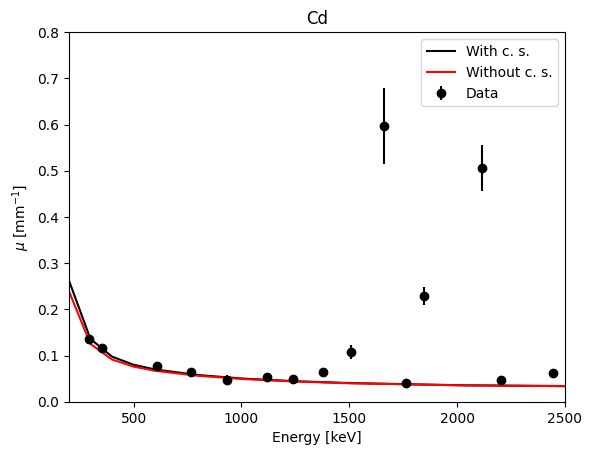

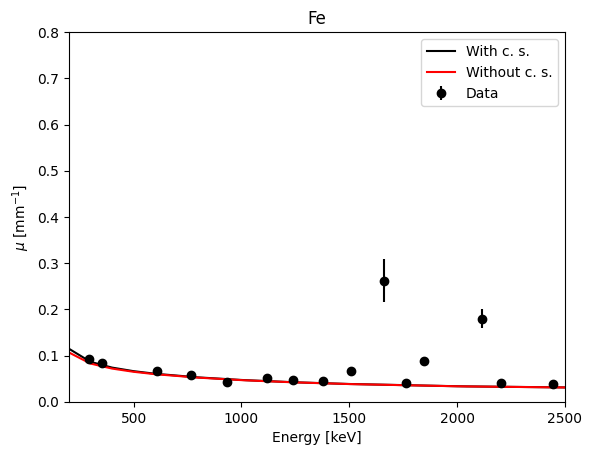

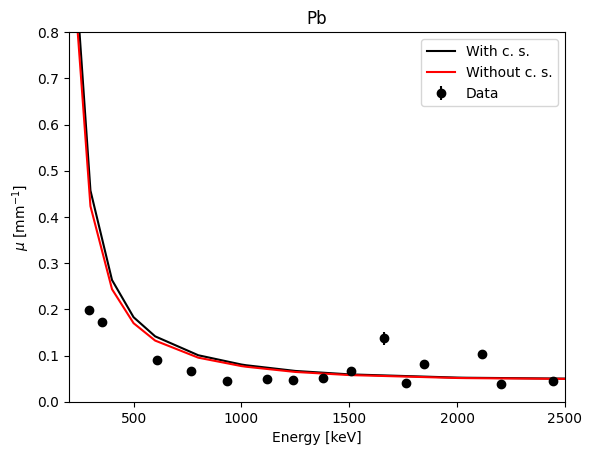

In [10]:
# Insert your code here

for element in fit_results:

    energies = np.array(sorted(fit_results[element].keys()))
    # Remove array elements around 1460 from energies (the potassium-40 peak)
    energies = np.delete(energies, np.where((energies > 1450) & (energies < 1470)))
    # TODO think about removing any other peaks. If you do so, explain later why.

    # Plot the data.
    mus = np.array([fit_results[element][e].nominal_value for e in energies])
    mus_unc = np.array([fit_results[element][e].std_dev for e in energies])
    plt.errorbar(energies, mus, mus_unc, fmt='o', label='Data', color='black')

    # Plot the theory curves.
    df = theory[element]
    plt.plot(df['E'], df['w'] , label='With c. s.'   , color='black')
    plt.plot(df['E'], df['wo'], label='Without c. s.', color='red')

    # Labels etc.
    plt.xlabel('Energy [keV]')
    plt.ylabel(r'$\mu\ [\mathrm{mm}^{-1}]$')
    # TODO plot only relevant ranges
    plt.xlim(2e2,25e2)
    plt.ylim(0,0.8)
    plt.title(f'{element}')
    plt.legend()
    x = np.linspace(energies.min(), energies.max(), 100)
    plt.show()

$\color{red}{\textbf{Úkol:}}$ Diskutujte výsledky:
- Porovnejte naměřené a teoretické hodnoty zeslabovacích koeficientů.
- Diskutujte určení nejistoty naměřených hodnot.
  - Jsou některé efekty při určování nejistoty zanedbány?
- Diskutujte vliv geometrie aparatury na výsledky měření (ve vztahu k možným systematickým trendům v naměřených hodnotách).

$\color{red}{\textbf{Řešení:}}$ 

$\color{red}{\textbf{Úkol:}}$ Pro pozaďový pík $^{40}\mathrm{K}$ (1460 keV):
- Vytvořte graf počtu událostí v píku jako funkci tloušťky stínění.
  - Zobrazte data ze všech měření (Fe, Cd, Pb) ve stejném grafu.
- Fitujte graf konstantní funkcí.

Found peak at energy 1459.94 keV


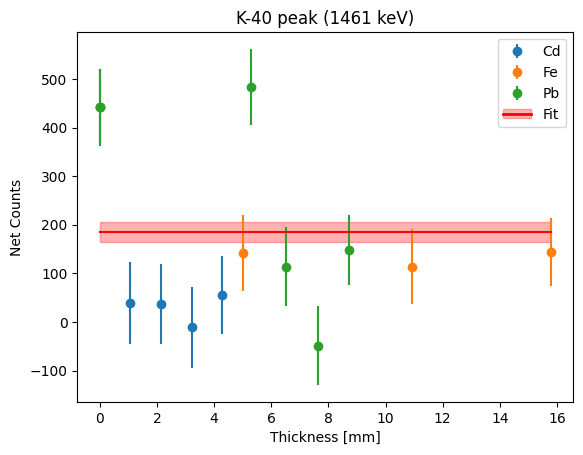

K-40 peak (1461 keV) fit result: c = 185+/-21


In [11]:
# Check the index of the row with the potassium 40 peak, based on the energy.
idx = data_dict['Cd'][0.][data_dict['Cd'][0.]['E'].between(1450, 1470)].index[0]

# Check if we found the correct peak by printing its energy
print(f"Found peak at energy {data_dict['Cd'][0.].loc[idx, 'E']} keV")

# Plot N vs thickness for the potassium 40 peak for each material
for element in data_dict:
    thickness = np.array(sorted(data_dict[element].keys()))
    N = np.array([data_dict[element][t].loc[idx, 'N'] for t in thickness])
    dN = np.array([data_dict[element][t].loc[idx, 'dN'] for t in thickness])
    plt.errorbar(thickness, N, yerr=dN, fmt='o', label=element)

# Fit with a constant function
def fit_func(x, c):
    return c * np.ones_like(x)

# Combine all data points for the fit
all_N = []
all_thickness = []
all_N_err = []
for element in data_dict:
    thickness = np.array(sorted(data_dict[element].keys()))
    N = np.array([data_dict[element][t].loc[idx, 'N'] for t in thickness])
    dN = np.array([data_dict[element][t].loc[idx, 'dN'] for t in thickness])
    all_N.extend(N)
    all_thickness.extend(thickness)
    all_N_err.extend(dN)

all_N = np.array(all_N)
all_thickness = np.array(all_thickness)
all_N_err = np.array(all_N_err)

# Do the fit
nom, cov = curve_fit(fit_func, all_thickness, all_N, sigma=all_N_err, absolute_sigma=True)
c = uncertainties.ufloat(nom[0], np.sqrt(cov[0, 0]))

# Plot the fit result
x = np.linspace(0, max(all_thickness), 100)
plt.plot(x, fit_func(x, c.nominal_value), 'r-')

# draw the fit function uncertainty band
plt.fill_between(x, fit_func(x, c.nominal_value - c.std_dev), fit_func(x, c.nominal_value + c.std_dev), color='red', alpha=0.3)

plt.xlabel('Thickness [mm]')
plt.ylabel('Net Counts')
plt.title('K-40 peak (1461 keV)')


# create a legend entry for the fit function and its uncertainty band
line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

# get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

plt.show()

# Print the fit result
print(f'K-40 peak (1461 keV) fit result: c = {c}')

$\color{red}{\textbf{Úkol:}}$ Diskutujte výsledky získané pro pozaďový pík $^{40}\mathrm{K}$ (1461 keV).

$\color{red}{\textbf{Řešení:}}$

# Literatura

[1] M. J. Berger, *et al.*, XCOM: Photon Cross Sections Database (2010). The National Institute of Standards and Technology (NIST). DOI:10.18434/T48G6X, dostupné na https://www.nist.gov/pml/xcom-photon-cross-sections-database.

[2] B. Singh, M. S. Basunia, J. Chen, et al., Nuclear Structure and Decay Data for A = 222 Isobars, Nucl.
Data Sheets 192 (2023) 315–421, DOI:10.1016/j.nds.2023.10.002, dostupné na https://www.nndc.bnl.gov/ensdf/.

[3] S. Zhu and E. A. McCutchan, Nuclear Data Sheets for A=214, Nucl. Data Sheets 175 (2021) 1–149, DOI:10.1016/j.nds.2021.06.001,
dostupné na https://www.nndc.bnl.gov/ensdf/.

[4] J. Chen, Nuclear Data Sheets for A=40, Nucl. Data Sheets 140 (2017) 1–376, DOI:10.1016/j.nds.2017.02.001, dostupné na
https://www.nndc.bnl.gov/ensdf/.